In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
%matplotlib inline
from IPython.display import Image
from __future__ import division
from __future__ import print_function

degtorad = np.pi/180.

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 29 days


In [50]:
def cos_angle2(angle1, n1, n2): # From Snell's law
    return np.sqrt(1 - (np.sin(angle1)*n1/n2)**2)

def reflectance_TE(angle1, n1, n2):
    c1 = np.cos(angle1)
    c2 = cos_angle2(angle1, n1, n2)
    temp = (n1*c1 - n2*c2) / (n1*c1 + n2*c2)
    return temp**2

def transmittance_TE(angle1, n1, n2):
    return 1.0 - reflectance_TE(angle1, n1, n2)

def reflectance_TM(angle1, n1, n2):
    c1 = np.cos(angle1)
    c2 = cos_angle2(angle1, n1, n2)
    temp = (n1*c2 - n2*c1) / (n1*c2 + n2*c1)
    return temp**2

def transmittance_TM(angle1, n1, n2):
    return 1.0 - reflectance_TM(angle1, n1, n2)

def reflectance_Unpol(angle1, n1, n2):
    rTE = reflectance_TE(angle1, n1, n2)
    rTM = reflectance_TM(angle1, n1, n2)
    return 0.5 * (rTE + rTM)

def transmittance_Unpol(angle1, n1, n2):
    return 1.0 - reflectance_Unpol(angle1, n1, n2)


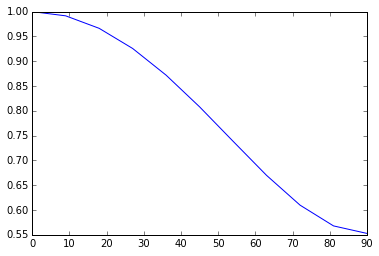

In [51]:
temp_angle1 = np.linspace(0.0, 90.0, 11)
plt.plot( temp_angle1, cos_angle2(temp_angle1*degtorad, 1.0, 1.2) )

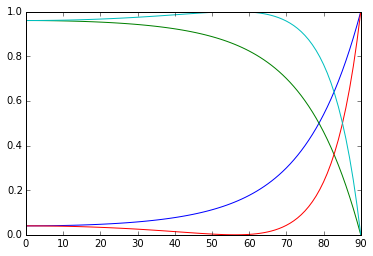

In [52]:
temp_angle1 = np.linspace(0.0, 90.0, 91)
n1 = 1.0
n2 = 1.5
fig, ax = plt.subplots()
ax.plot( temp_angle1, reflectance_TE(temp_angle1*degtorad, n1, n2) )
ax.plot( temp_angle1, transmittance_TE(temp_angle1*degtorad, n1, n2) )
ax.plot( temp_angle1, reflectance_TM(temp_angle1*degtorad, n1, n2) )
ax.plot( temp_angle1, transmittance_TM(temp_angle1*degtorad, n1, n2) )

In [55]:
brewsterangle = np.arctan2(n2, n1)
deltaangle = 0.01
print(n1, n2, brewsterangle/degtorad, 'deg')
print(reflectance_TM(brewsterangle, n1, n2), transmittance_TM(brewsterangle, n1, n2))

1.0 1.5 56.309932474 deg
0.0 1.0
